In [19]:
import scipy.stats

import numpy as np

import matplotlib

width = 8
height = width/1.618

font=15
matplotlib.rcParams.update({
    'font.size': font,
    'figure.figsize': (width, height), 
    'figure.facecolor': 'white', 
    'savefig.dpi': 300, 
    'figure.subplot.bottom': 0.125, 
    'figure.edgecolor': 'white',
    'xtick.labelsize': font,
    'ytick.labelsize': font,
})

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [20]:
def exp_decay(i, eta_0, rate):
    return eta_0 * np.exp(-rate * i)

def exp_decay_periodic(i, eta_0, rate, periode):
    return exp_decay(i % periode, eta_0, rate)

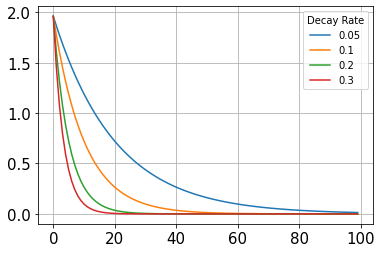

In [21]:
# impact of rate

x = np.arange(100)
eta_0 = 1.96

rates = [0.05, 0.1, 0.2, 0.3]

plt.figure()
for rate in rates:
    y = [exp_decay(i, eta_0, rate) for i in x]
    plt.plot(x, y, label=f"{rate}")
plt.grid()
plt.legend(title="Decay Rate")
plt.show()

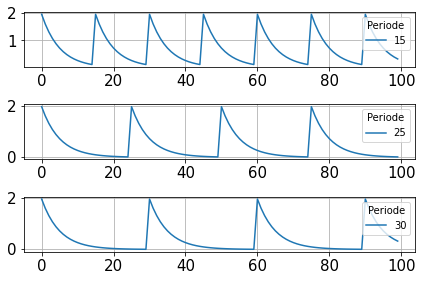

In [27]:
# impact of periode

eta_0 = 1.96
rate = 0.2
periodes = [15, 25, 30]
plt.figure()
for i, periode in enumerate(periodes):
    plt.subplot(len(periodes), 1, i+1)
    y = [exp_decay_periodic(i, eta_0, rate, periode) for i in x]
    plt.plot(x, y, label=f"{periode}")
    plt.grid()
    plt.legend(title="Periode", loc="upper right")
plt.tight_layout()
plt.show()

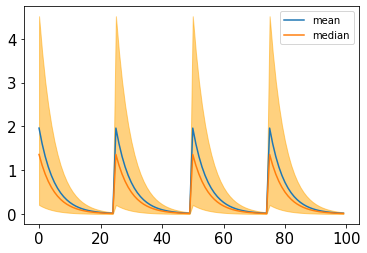

In [45]:
eta_0 = 1.96
rate = 0.2
periode = 25
eta_0_mean = scipy.stats.expon.mean(scale=eta_0)
eta_0_median = scipy.stats.expon.ppf(0.5, scale=eta_0)
eta_0_qbottom = scipy.stats.expon.ppf(0.1, scale=eta_0)
eta_0_qtop = scipy.stats.expon.ppf(0.9, scale=eta_0)


plt.figure()
y = exp_decay_periodic(x, eta_0_mean, rate, periode)
plt.plot(x, y, label="mean")
y_median = exp_decay_periodic(x, eta_0_median, rate, periode)
y_bottom = exp_decay_periodic(x, eta_0_qbottom, rate, periode)
y_top = exp_decay_periodic(x, eta_0_qtop, rate, periode)
plt.plot(x, y_median, label="median")
plt.fill_between(x, y_bottom, y_top, alpha=0.5, color="orange")
plt.legend()
plt.show()

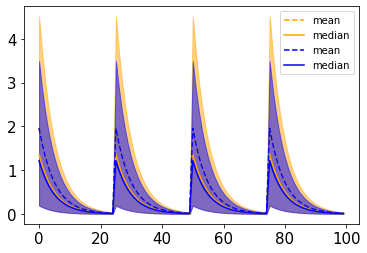

In [56]:
eta_0 = 1.96
rate = 0.2
periode = 25

plt.figure()

dist = scipy.stats.expon(scale=eta_0)

eta_0_mean = dist.mean()
eta_0_median = dist.ppf(0.5)
eta_0_qbottom = dist.ppf(0.1)
eta_0_qtop = dist.ppf(0.9)

y_mean = exp_decay_periodic(x, eta_0_mean, rate, periode)
y_median = exp_decay_periodic(x, eta_0_median, rate, periode)
y_bottom = exp_decay_periodic(x, eta_0_qbottom, rate, periode)
y_top = exp_decay_periodic(x, eta_0_qtop, rate, periode)

plt.plot(x, y, color="orange", linestyle="dashed", label="mean")
plt.plot(x, y_median, color="orange", label="median")
plt.fill_between(x, y_bottom, y_top, alpha=0.5, color="orange")

dist = scipy.stats.truncexpon(b=2.576, scale=eta_0)

eta_0_mean = dist.mean()
eta_0_median = dist.ppf(0.5)
eta_0_qbottom = dist.ppf(0.1)
eta_0_qtop = dist.ppf(0.9)

y_mean = exp_decay_periodic(x, eta_0_mean, rate, periode)
y_median = exp_decay_periodic(x, eta_0_median, rate, periode)
y_bottom = exp_decay_periodic(x, eta_0_qbottom, rate, periode)
y_top = exp_decay_periodic(x, eta_0_qtop, rate, periode)

plt.plot(x, y, color="blue", linestyle="dashed", label="mean")
plt.plot(x, y_median, color="blue", label="median")
plt.fill_between(x, y_bottom, y_top, alpha=0.5, color="blue")

plt.legend()
plt.show()

In [ ]:
# confidence interval normal distribution
# 90% 1.645
# 95% 1.960
# 99% 2.576

In [52]:
scipy.stats.expon.rvs(size=10, scale=eta_0, random_state)

array([2.78526431, 2.42028507, 0.14026686, 1.97972793, 1.48721418,
       0.96939401, 2.00749962, 3.40165955, 2.09583613, 0.3318558 ])

In [51]:
scipy.stats.truncexpon.mean(b=2.576, scale=eta_0)

1.5442580023626578

In [50]:
scipy.stats.truncexpon.mean(b=eta_0, scale=1)

0.6786530745011512

In [42]:
scipy.stats.expon.median(scale=eta_0)

1.3585684738974928

In [43]:
scipy.stats.expon.ppf(0.5, scale=eta_0)

1.3585684738974928

In [3]:
# cosine schedule
kappa_max = 1.96
kappa_min = 0.001
periode = 25
kappa_val = lambda i: kappa_min + 0.5 * (kappa_max - kappa_min) * (1 + np.cos(i/periode*np.pi))
y_cosine_25 = [kappa_val(i) for i in range(100)]

<IPython.core.display.Javascript object>


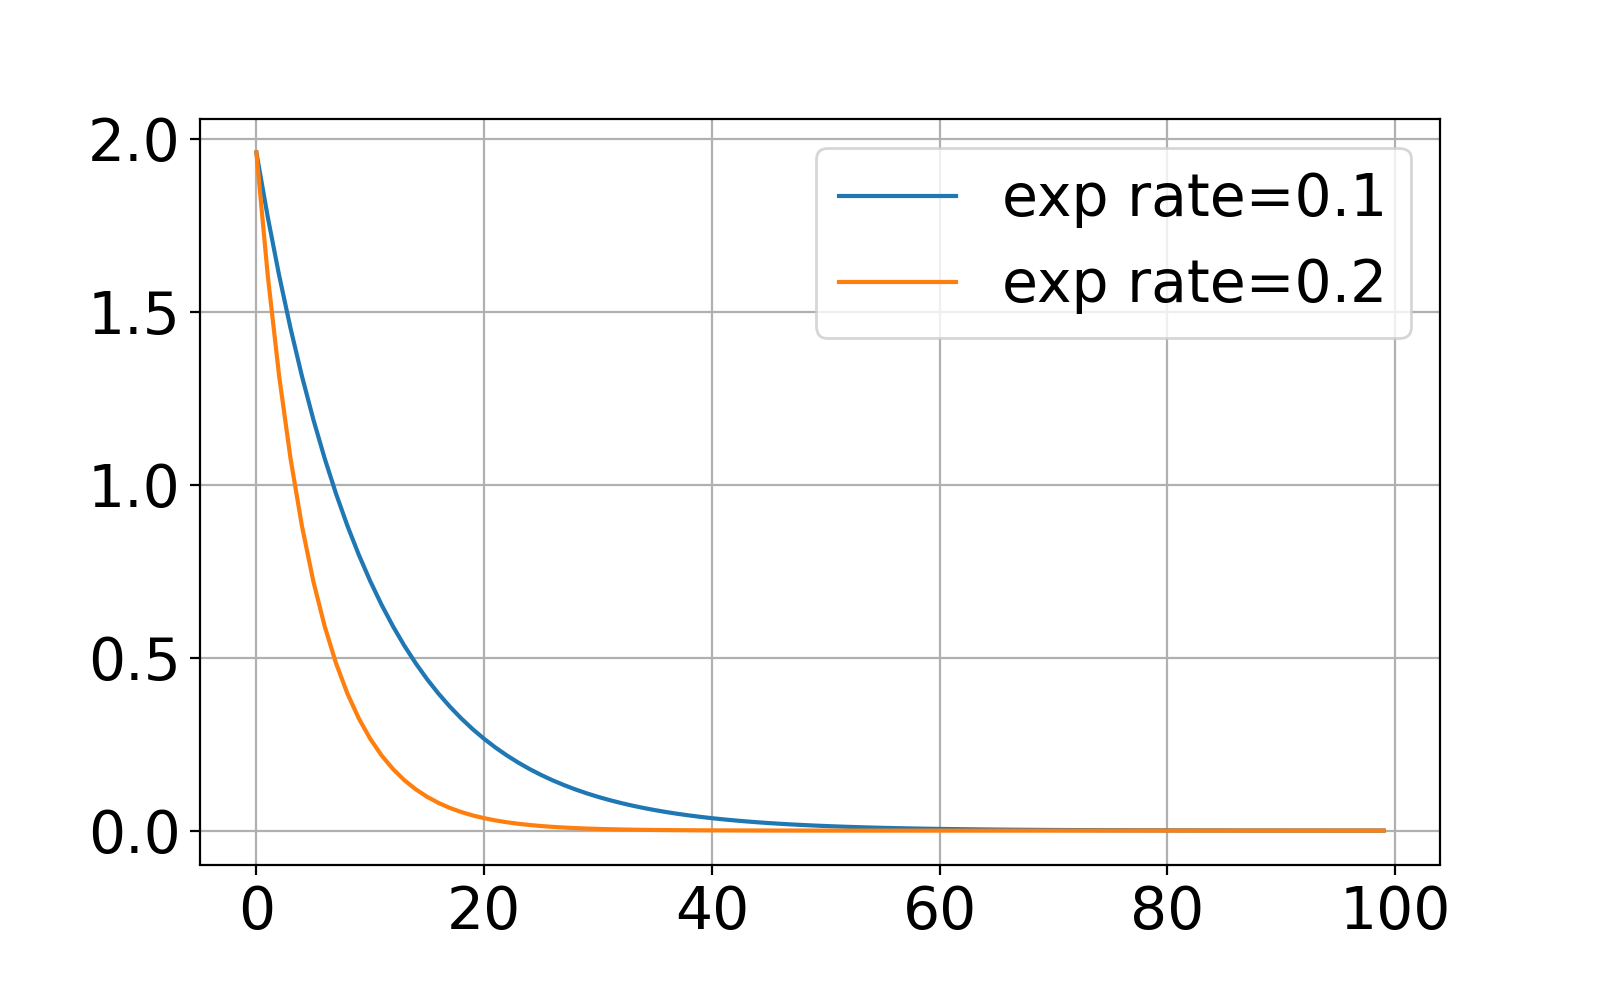

In [4]:
plt.figure()
plt.plot(y_exp_01, label="exp rate=0.1")
plt.plot(y_exp_02, label="exp rate=0.2")
# plt.plot(y_cosine_25, label="cos periode=25")
plt.grid()
plt.legend()
plt.show()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive
%matplotlib inline

def scheduler(kappa=1.96, i=0, decay_rate=0.1, periode=25, num_workers=10):
    random_state = np.random.RandomState(42)
#     kappa_0 = random_state.exponential(kappa, size=num_workers)
    kappa_0 = scipy.stats.truncexpon.rvs(kappa, size=10) # b=3.891
    kappa_i = kappa_0 * np.exp(-decay_rate*(i%periode))
    plt.scatter(np.zeros((num_workers,)), kappa_i)
    plt.ylim(0, kappa)
    plt.show()

interactive_plot = interactive(scheduler, i=(0,100))
interactive_plot

interactive(children=(FloatSlider(value=1.96, description='kappa', max=5.88, min=-1.96), IntSlider(value=0, de…

In [40]:
import logging

logging.basicConfig(
    # filename=path_log_file, # optional if we want to store the logs to disk
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(filename)s:%(funcName)s - %(message)s",
    force=True,
)

In [44]:
def run(config: dict):
    return -config["x"]**2



from deephyper.problem import HpProblem
from deephyper.search.hps import CBO

# define the variable you want to optimize
problem = HpProblem()
problem.add_hyperparameter((-10.0, 10.0), "x")


# define your search and execute it
scheduler = None
search = CBO(problem, run, scheduler=scheduler)

results_no_decay = search.search(max_evals=100)

2022-10-27 17:29:28,672 - INFO - _evaluator.py:create - Creating Evaluator(<function run at 0x2b092e280>, method=serial, method_kwargs={'callbacks': [<deephyper.evaluator.callback.TqdmCallback object at 0x2b0a669a0>]}...
2022-10-27 17:29:28,674 - INFO - _serial.py:__init__ - Serial Evaluator will execute run() from module __main__
2022-10-27 17:29:28,676 - INFO - _evaluator.py:create - Creation done
2022-10-27 17:29:28,681 - INFO - _cbo.py:_search - Asking 1 initial configurations...
2022-10-27 17:29:28,690 - INFO - _cbo.py:_search - Asking took 0.0089 sec.
2022-10-27 17:29:28,691 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:29:28,691 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:28,691 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:29:28,692 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:29:28,692 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:29:28,692 - INFO 

  0%|          | 0/100 [00:00<?, ?it/s]

2022-10-27 17:29:28,705 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:29:28,706 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0127 sec.
2022-10-27 17:29:28,706 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:29:28,707 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:29:28,707 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:29:28,708 - INFO - _cbo.py:_search - Dumping took 0.0011 sec.
2022-10-27 17:29:28,708 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:29:28,708 - INFO - _cbo.py:_search - Transformation took 0.0001 sec.
2022-10-27 17:29:28,708 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:29:28,709 - INFO - _cbo.py:_search - Fitting took 0.0001 sec.
2022-10-27 17:29:28,709 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:29:28,723 - INFO - _cbo.py:_search - Asking took 0.0138 sec.
2022-10-27 17:29:28,724 - INFO - _cbo.py:_search -

2022-10-27 17:29:28,802 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:29:28,802 - INFO - _cbo.py:_search - Dumping took 0.0007 sec.
2022-10-27 17:29:28,802 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:29:28,802 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:28,802 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:29:28,803 - INFO - _cbo.py:_search - Fitting took 0.0001 sec.
2022-10-27 17:29:28,803 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:29:28,960 - INFO - _cbo.py:_search - Asking took 0.1570 sec.
2022-10-27 17:29:28,961 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:29:28,961 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:28,961 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:29:28,961 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:29:28,

2022-10-27 17:29:29,260 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:29,260 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:29:29,382 - INFO - _cbo.py:_search - Fitting took 0.1217 sec.
2022-10-27 17:29:29,382 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:29:29,498 - INFO - _cbo.py:_search - Asking took 0.1156 sec.
2022-10-27 17:29:29,499 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:29:29,499 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:29,499 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:29:29,499 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:29:29,500 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:29:29,500 - INFO - _cbo.py:_search - Submition took 0.0005 sec.
2022-10-27 17:29:29,500 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:29:29,500 - INFO - _evaluator.py:gather - 

2022-10-27 17:29:30,900 - INFO - _cbo.py:_search - Asking took 0.1332 sec.
2022-10-27 17:29:30,901 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:29:30,901 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:30,901 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:29:30,901 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:29:30,902 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:29:30,902 - INFO - _cbo.py:_search - Submition took 0.0005 sec.
2022-10-27 17:29:30,902 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:29:30,902 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:29:30,903 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:29:30,904 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0017 sec.
2022-10-27 17:29:30,904 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:29:30,904 - INFO - _evaluator.py:dump_evals -

2022-10-27 17:29:32,397 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:29:32,397 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:29:32,397 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:29:32,397 - INFO - _cbo.py:_search - Submition took 0.0006 sec.
2022-10-27 17:29:32,398 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:29:32,398 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:29:32,399 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:29:32,399 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0014 sec.
2022-10-27 17:29:32,399 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:29:32,400 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:29:32,400 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:29:32,401 - INFO - _cbo.py:_search - Dumping took 0.0008 sec.
2022-10-27 17:29:32,401 - INFO - _cbo.py:_search - Transforming received c

2022-10-27 17:29:33,848 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:29:33,848 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:29:33,849 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:29:33,849 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0012 sec.
2022-10-27 17:29:33,849 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:29:33,849 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:29:33,850 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:29:33,850 - INFO - _cbo.py:_search - Dumping took 0.0007 sec.
2022-10-27 17:29:33,850 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:29:33,850 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:33,851 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:29:34,143 - INFO - _cbo.py:_search - Fitting took 0.2919 sec.
2022-10-27 17:29:34,143 - INFO - _cbo.py:_search -

2022-10-27 17:29:35,521 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:29:35,521 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:29:35,522 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:29:35,522 - INFO - _cbo.py:_search - Dumping took 0.0008 sec.
2022-10-27 17:29:35,522 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:29:35,522 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:35,522 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:29:35,682 - INFO - _cbo.py:_search - Fitting took 0.1596 sec.
2022-10-27 17:29:35,683 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:29:35,837 - INFO - _cbo.py:_search - Asking took 0.1539 sec.
2022-10-27 17:29:35,837 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:29:35,837 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:35,838 - INF

2022-10-27 17:29:37,209 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:29:37,209 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:37,209 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:29:37,362 - INFO - _cbo.py:_search - Fitting took 0.1529 sec.
2022-10-27 17:29:37,362 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:29:37,518 - INFO - _cbo.py:_search - Asking took 0.1555 sec.
2022-10-27 17:29:37,518 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:29:37,519 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:37,519 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:29:37,519 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:29:37,519 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:29:37,520 - INFO - _cbo.py:_search - Submition took 0.0005 sec.
2022-10-27 17:29:37,520 - 

2022-10-27 17:29:39,088 - INFO - _cbo.py:_search - Fitting took 0.1570 sec.
2022-10-27 17:29:39,088 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:29:39,243 - INFO - _cbo.py:_search - Asking took 0.1546 sec.
2022-10-27 17:29:39,243 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:29:39,244 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:39,244 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:29:39,244 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:29:39,244 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:29:39,245 - INFO - _cbo.py:_search - Submition took 0.0005 sec.
2022-10-27 17:29:39,245 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:29:39,245 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:29:39,246 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:29:39,246 - INFO - _cbo.py:_search - Gathered

2022-10-27 17:29:41,007 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:41,007 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:29:41,007 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:29:41,007 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:29:41,008 - INFO - _cbo.py:_search - Submition took 0.0004 sec.
2022-10-27 17:29:41,008 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:29:41,008 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:29:41,009 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:29:41,009 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0013 sec.
2022-10-27 17:29:41,009 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:29:41,010 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:29:41,010 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:29:41,010 - INFO - _cbo.py:_search - Dumping took 0.0

2022-10-27 17:29:42,617 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:29:42,617 - INFO - _cbo.py:_search - Submition took 0.0005 sec.
2022-10-27 17:29:42,617 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:29:42,617 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:29:42,618 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:29:42,619 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0012 sec.
2022-10-27 17:29:42,619 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:29:42,619 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:29:42,620 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:29:42,620 - INFO - _cbo.py:_search - Dumping took 0.0007 sec.
2022-10-27 17:29:42,620 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:29:42,620 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:42,620 - INFO - _cbo.py:_search - Fitti

2022-10-27 17:29:44,407 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:29:44,408 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0016 sec.
2022-10-27 17:29:44,408 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:29:44,408 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:29:44,409 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:29:44,409 - INFO - _cbo.py:_search - Dumping took 0.0008 sec.
2022-10-27 17:29:44,409 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:29:44,409 - INFO - _cbo.py:_search - Transformation took 0.0001 sec.
2022-10-27 17:29:44,410 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:29:44,572 - INFO - _cbo.py:_search - Fitting took 0.1624 sec.
2022-10-27 17:29:44,573 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:29:44,734 - INFO - _cbo.py:_search - Asking took 0.1615 sec.
2022-10-27 17:29:44,735 - INFO - _cbo.py:_search -

2022-10-27 17:29:46,202 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:29:46,202 - INFO - _cbo.py:_search - Dumping took 0.0006 sec.
2022-10-27 17:29:46,202 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:29:46,202 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:46,203 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:29:46,368 - INFO - _cbo.py:_search - Fitting took 0.1652 sec.
2022-10-27 17:29:46,368 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:29:46,530 - INFO - _cbo.py:_search - Asking took 0.1618 sec.
2022-10-27 17:29:46,531 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:29:46,531 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:46,531 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:29:46,531 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:29:46,

2022-10-27 17:29:48,022 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:48,022 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:29:48,193 - INFO - _cbo.py:_search - Fitting took 0.1706 sec.
2022-10-27 17:29:48,193 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:29:48,358 - INFO - _cbo.py:_search - Asking took 0.1643 sec.
2022-10-27 17:29:48,358 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:29:48,358 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:48,359 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:29:48,359 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:29:48,359 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:29:48,359 - INFO - _cbo.py:_search - Submition took 0.0006 sec.
2022-10-27 17:29:48,360 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:29:48,360 - INFO - _evaluator.py:gather - 

2022-10-27 17:29:50,173 - INFO - _cbo.py:_search - Asking took 0.1668 sec.
2022-10-27 17:29:50,174 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:29:50,174 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:50,174 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:29:50,174 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:29:50,175 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:29:50,175 - INFO - _cbo.py:_search - Submition took 0.0005 sec.
2022-10-27 17:29:50,175 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:29:50,175 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:29:50,176 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:29:50,176 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0012 sec.
2022-10-27 17:29:50,176 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:29:50,177 - INFO - _evaluator.py:dump_evals -

2022-10-27 17:29:51,978 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:29:51,978 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:29:51,978 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:29:51,979 - INFO - _cbo.py:_search - Submition took 0.0005 sec.
2022-10-27 17:29:51,979 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:29:51,979 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:29:51,980 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:29:51,980 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0012 sec.
2022-10-27 17:29:51,980 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:29:51,981 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:29:51,981 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:29:51,981 - INFO - _cbo.py:_search - Dumping took 0.0007 sec.
2022-10-27 17:29:51,981 - INFO - _cbo.py:_search - Transforming received c

2022-10-27 17:29:53,683 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:29:53,683 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:29:53,684 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:29:53,685 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0012 sec.
2022-10-27 17:29:53,685 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:29:53,685 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:29:53,685 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:29:53,686 - INFO - _cbo.py:_search - Dumping took 0.0006 sec.
2022-10-27 17:29:53,686 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:29:53,686 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:53,686 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:29:53,850 - INFO - _cbo.py:_search - Fitting took 0.1638 sec.
2022-10-27 17:29:53,850 - INFO - _cbo.py:_search -

2022-10-27 17:29:55,481 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:29:55,481 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:29:55,482 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:29:55,482 - INFO - _cbo.py:_search - Dumping took 0.0007 sec.
2022-10-27 17:29:55,482 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:29:55,482 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:55,483 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:29:55,654 - INFO - _cbo.py:_search - Fitting took 0.1711 sec.
2022-10-27 17:29:55,654 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:29:55,813 - INFO - _cbo.py:_search - Asking took 0.1587 sec.
2022-10-27 17:29:55,813 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:29:55,814 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:55,814 - INF

2022-10-27 17:29:57,316 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:29:57,316 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:57,316 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:29:57,478 - INFO - _cbo.py:_search - Fitting took 0.1616 sec.
2022-10-27 17:29:57,478 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:29:57,634 - INFO - _cbo.py:_search - Asking took 0.1553 sec.
2022-10-27 17:29:57,634 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:29:57,634 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:57,634 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:29:57,634 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:29:57,635 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:29:57,635 - INFO - _cbo.py:_search - Submition took 0.0005 sec.
2022-10-27 17:29:57,635 - 

2022-10-27 17:29:59,263 - INFO - _cbo.py:_search - Fitting took 0.1669 sec.
2022-10-27 17:29:59,263 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:29:59,420 - INFO - _cbo.py:_search - Asking took 0.1564 sec.
2022-10-27 17:29:59,420 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:29:59,420 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:59,420 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:29:59,420 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:29:59,421 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:29:59,421 - INFO - _cbo.py:_search - Submition took 0.0005 sec.
2022-10-27 17:29:59,421 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:29:59,421 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:29:59,422 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:29:59,422 - INFO - _cbo.py:_search - Gathered

In [45]:
scheduler = {
    "type": "periodic-exp-decay",
    "periode": 25,
    "rate": 0.1
}
search = CBO(problem, run, scheduler=scheduler)

results_decay = search.search(max_evals=100)

2022-10-27 17:29:59,427 - INFO - _evaluator.py:create - Creating Evaluator(<function run at 0x2b092e280>, method=serial, method_kwargs={'callbacks': [<deephyper.evaluator.callback.TqdmCallback object at 0x2b09ae0a0>]}...
2022-10-27 17:29:59,428 - INFO - _serial.py:__init__ - Serial Evaluator will execute run() from module __main__
2022-10-27 17:29:59,428 - INFO - _evaluator.py:create - Creation done
2022-10-27 17:29:59,429 - INFO - _cbo.py:__init__ - Set up scheduler 'periodic-exp-decay' with parameters '{'periode': 25, 'rate': 0.1}'
2022-10-27 17:29:59,431 - INFO - _cbo.py:_search - Asking 1 initial configurations...
2022-10-27 17:29:59,438 - INFO - _cbo.py:_search - Asking took 0.0060 sec.
2022-10-27 17:29:59,438 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:29:59,438 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:59,439 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:29:59,439 - INFO - _evaluator.

  0%|          | 0/100 [00:00<?, ?it/s]

2022-10-27 17:29:59,450 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:29:59,450 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0103 sec.
2022-10-27 17:29:59,451 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:29:59,451 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:29:59,452 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:29:59,452 - INFO - _cbo.py:_search - Dumping took 0.0011 sec.
2022-10-27 17:29:59,452 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:29:59,452 - INFO - _cbo.py:_search - Transformation took 0.0001 sec.
2022-10-27 17:29:59,453 - INFO - _cbo.py:_apply_scheduler - Updated exploration-exploitation policy with {'kappa': 1.7734813393504807, 'xi': 0.0009048374180359595} from scheduler
2022-10-27 17:29:59,453 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:29:59,453 - INFO - _cbo.py:_search - Fitting took 0.0001 sec.
2022-10-27 17:29:59,453 - IN

2022-10-27 17:29:59,539 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:29:59,540 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:59,540 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:29:59,540 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:29:59,540 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:29:59,541 - INFO - _cbo.py:_search - Submition took 0.0007 sec.
2022-10-27 17:29:59,541 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:29:59,541 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:29:59,543 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:29:59,543 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0018 sec.
2022-10-27 17:29:59,543 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:29:59,544 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:29:59,544 - INFO - _evaluator.py:dump_e

2022-10-27 17:29:59,760 - INFO - _cbo.py:_search - Transformation took 0.0001 sec.
2022-10-27 17:29:59,760 - INFO - _cbo.py:_apply_scheduler - Updated exploration-exploitation policy with {'kappa': 0.721043704696027, 'xi': 0.00036787944117144236} from scheduler
2022-10-27 17:29:59,760 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:29:59,877 - INFO - _cbo.py:_search - Fitting took 0.1170 sec.
2022-10-27 17:29:59,878 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:29:59,991 - INFO - _cbo.py:_search - Asking took 0.1129 sec.
2022-10-27 17:29:59,991 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:29:59,992 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:29:59,992 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:29:59,992 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:29:59,992 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:29:59,992 

2022-10-27 17:30:00,960 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:30:00,961 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:30:00,961 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0012 sec.
2022-10-27 17:30:00,962 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:30:00,962 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:30:00,962 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:30:00,963 - INFO - _cbo.py:_search - Dumping took 0.0008 sec.
2022-10-27 17:30:00,963 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:30:00,963 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:30:00,963 - INFO - _cbo.py:_apply_scheduler - Updated exploration-exploitation policy with {'kappa': 0.43733511389092244, 'xi': 0.00022313016014842982} from scheduler
2022-10-27 17:30:00,963 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:

2022-10-27 17:30:02,413 - INFO - _cbo.py:_search - Asking took 0.1272 sec.
2022-10-27 17:30:02,414 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:30:02,414 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:30:02,414 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:30:02,414 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:30:02,415 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:30:02,415 - INFO - _cbo.py:_search - Submition took 0.0005 sec.
2022-10-27 17:30:02,415 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:30:02,415 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:30:02,416 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:30:02,417 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0014 sec.
2022-10-27 17:30:02,417 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:30:02,417 - INFO - _evaluator.py:dump_evals -

2022-10-27 17:30:03,597 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:30:03,597 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:30:03,598 - INFO - _cbo.py:_apply_scheduler - Updated exploration-exploitation policy with {'kappa': 0.17780718844724844, 'xi': 9.071795328941248e-05} from scheduler
2022-10-27 17:30:03,598 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:30:03,727 - INFO - _cbo.py:_search - Fitting took 0.1293 sec.
2022-10-27 17:30:03,728 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:30:03,851 - INFO - _cbo.py:_search - Asking took 0.1229 sec.
2022-10-27 17:30:03,851 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:30:03,851 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:30:03,852 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:30:03,852 - INFO - _evaluator.py:submit - submit 1 job(s) st

2022-10-27 17:30:05,081 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:30:05,081 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:30:05,082 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:30:05,083 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0017 sec.
2022-10-27 17:30:05,083 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:30:05,083 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:30:05,084 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:30:05,084 - INFO - _cbo.py:_search - Dumping took 0.0008 sec.
2022-10-27 17:30:05,084 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:30:05,084 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:30:05,085 - INFO - _cbo.py:_apply_scheduler - Updated exploration-exploitation policy with {'kappa': 1.3138272902298531, 'xi': 0.0006703200460356394} from scheduler
2022-10-27 17:30:05,085

2022-10-27 17:30:06,402 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:30:06,540 - INFO - _cbo.py:_search - Asking took 0.1378 sec.
2022-10-27 17:30:06,540 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:30:06,540 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:30:06,540 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:30:06,541 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:30:06,541 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:30:06,541 - INFO - _cbo.py:_search - Submition took 0.0005 sec.
2022-10-27 17:30:06,541 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:30:06,542 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:30:06,543 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:30:06,544 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0019 sec.
2022-10-27 17:30:06,544 - INFO - _cbo.py:_search - 

2022-10-27 17:30:07,857 - INFO - _cbo.py:_search - Dumping took 0.0007 sec.
2022-10-27 17:30:07,857 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:30:07,857 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:30:07,857 - INFO - _cbo.py:_apply_scheduler - Updated exploration-exploitation policy with {'kappa': 0.5341623143466647, 'xi': 0.0002725317930340126} from scheduler
2022-10-27 17:30:07,857 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:30:07,998 - INFO - _cbo.py:_search - Fitting took 0.1406 sec.
2022-10-27 17:30:07,999 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:30:08,133 - INFO - _cbo.py:_search - Asking took 0.1345 sec.
2022-10-27 17:30:08,134 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:30:08,134 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:30:08,134 - INFO - _cbo.py:_search - Submitting 1 configurations...

2022-10-27 17:30:09,443 - INFO - _cbo.py:_search - Submition took 0.0005 sec.
2022-10-27 17:30:09,443 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:30:09,443 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:30:09,445 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:30:09,445 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0013 sec.
2022-10-27 17:30:09,445 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:30:09,445 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:30:09,446 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:30:09,446 - INFO - _cbo.py:_search - Dumping took 0.0007 sec.
2022-10-27 17:30:09,446 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:30:09,446 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:30:09,447 - INFO - _cbo.py:_apply_scheduler - Updated exploration-exploitation policy with {'kappa': 0.3239858

2022-10-27 17:30:10,878 - INFO - _cbo.py:_search - Fitting took 0.2730 sec.
2022-10-27 17:30:10,878 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:30:11,016 - INFO - _cbo.py:_search - Asking took 0.1377 sec.
2022-10-27 17:30:11,016 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:30:11,016 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:30:11,017 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:30:11,017 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:30:11,017 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:30:11,017 - INFO - _cbo.py:_search - Submition took 0.0004 sec.
2022-10-27 17:30:11,017 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:30:11,018 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:30:11,019 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:30:11,019 - INFO - _cbo.py:_search - Gathered

2022-10-27 17:30:12,173 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:30:12,173 - INFO - _cbo.py:_search - Dumping took 0.0009 sec.
2022-10-27 17:30:12,173 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:30:12,174 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:30:12,174 - INFO - _cbo.py:_apply_scheduler - Updated exploration-exploitation policy with {'kappa': 1.6047122760328443, 'xi': 0.0008187307530779819} from scheduler
2022-10-27 17:30:12,174 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:30:12,325 - INFO - _cbo.py:_search - Fitting took 0.1506 sec.
2022-10-27 17:30:12,325 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:30:12,471 - INFO - _cbo.py:_search - Asking took 0.1457 sec.
2022-10-27 17:30:12,472 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:30:12,472 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-

2022-10-27 17:30:13,793 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:30:13,794 - INFO - _cbo.py:_search - Submition took 0.0005 sec.
2022-10-27 17:30:13,794 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:30:13,794 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:30:13,795 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:30:13,795 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0012 sec.
2022-10-27 17:30:13,795 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:30:13,796 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:30:13,796 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:30:13,796 - INFO - _cbo.py:_search - Dumping took 0.0006 sec.
2022-10-27 17:30:13,796 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:30:13,797 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:30:13,797 - INFO - _cbo.py:_apply_schedule

2022-10-27 17:30:15,113 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:30:15,267 - INFO - _cbo.py:_search - Fitting took 0.1547 sec.
2022-10-27 17:30:15,268 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:30:15,419 - INFO - _cbo.py:_search - Asking took 0.1515 sec.
2022-10-27 17:30:15,420 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:30:15,420 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:30:15,420 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:30:15,421 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:30:15,421 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:30:15,421 - INFO - _cbo.py:_search - Submition took 0.0005 sec.
2022-10-27 17:30:15,421 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:30:15,421 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:30:15,422 - INFO - _evaluator.py:gath

2022-10-27 17:30:16,769 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:30:16,769 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:30:16,769 - INFO - _cbo.py:_search - Dumping took 0.0007 sec.
2022-10-27 17:30:16,769 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:30:16,770 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:30:16,770 - INFO - _cbo.py:_apply_scheduler - Updated exploration-exploitation policy with {'kappa': 0.39571717526952455, 'xi': 0.00020189651799465538} from scheduler
2022-10-27 17:30:16,770 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:30:16,924 - INFO - _cbo.py:_search - Fitting took 0.1537 sec.
2022-10-27 17:30:16,924 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:30:17,065 - INFO - _cbo.py:_search - Asking took 0.1405 sec.
2022-10-27 17:30:17,065 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-

2022-10-27 17:30:18,283 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:30:18,283 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:30:18,283 - INFO - _cbo.py:_search - Submition took 0.0005 sec.
2022-10-27 17:30:18,284 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:30:18,284 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:30:18,285 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:30:18,285 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0012 sec.
2022-10-27 17:30:18,285 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:30:18,285 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:30:18,286 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:30:18,286 - INFO - _cbo.py:_search - Dumping took 0.0007 sec.
2022-10-27 17:30:18,286 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:30:18,286 - INFO - _cbo.py:_search - Transf

2022-10-27 17:30:19,621 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:30:19,772 - INFO - _cbo.py:_search - Fitting took 0.1505 sec.
2022-10-27 17:30:19,772 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:30:19,916 - INFO - _cbo.py:_search - Asking took 0.1440 sec.
2022-10-27 17:30:19,917 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:30:19,917 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:30:19,917 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:30:19,917 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:30:19,918 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:30:19,918 - INFO - _cbo.py:_search - Submition took 0.0005 sec.
2022-10-27 17:30:19,918 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:30:19,918 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:30:19,919 - INFO - _evaluator.py:gath

2022-10-27 17:30:21,304 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:30:21,305 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:30:21,305 - INFO - _cbo.py:_search - Dumping took 0.0007 sec.
2022-10-27 17:30:21,305 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:30:21,305 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:30:21,306 - INFO - _cbo.py:_apply_scheduler - Updated exploration-exploitation policy with {'kappa': 1.1888000930367615, 'xi': 0.0006065306597126335} from scheduler
2022-10-27 17:30:21,306 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:30:21,462 - INFO - _cbo.py:_search - Fitting took 0.1555 sec.
2022-10-27 17:30:21,462 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:30:21,612 - INFO - _cbo.py:_search - Asking took 0.1496 sec.
2022-10-27 17:30:21,612 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10

2022-10-27 17:30:22,966 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:30:22,966 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:30:22,966 - INFO - _cbo.py:_search - Submition took 0.0005 sec.
2022-10-27 17:30:22,966 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:30:22,967 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:30:22,968 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:30:22,968 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0012 sec.
2022-10-27 17:30:22,968 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:30:22,968 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:30:22,969 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:30:22,969 - INFO - _cbo.py:_search - Dumping took 0.0007 sec.
2022-10-27 17:30:22,969 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:30:22,969 - INFO - _cbo.py:_search - Transf

2022-10-27 17:30:24,191 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:30:24,343 - INFO - _cbo.py:_search - Fitting took 0.1520 sec.
2022-10-27 17:30:24,343 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:30:24,494 - INFO - _cbo.py:_search - Asking took 0.1499 sec.
2022-10-27 17:30:24,494 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-10-27 17:30:24,494 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:30:24,494 - INFO - _cbo.py:_search - Submitting 1 configurations...
2022-10-27 17:30:24,494 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:30:24,495 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:30:24,495 - INFO - _cbo.py:_search - Submition took 0.0004 sec.
2022-10-27 17:30:24,495 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:30:24,495 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:30:24,496 - INFO - _evaluator.py:gath

2022-10-27 17:30:25,881 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:30:25,882 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:30:25,882 - INFO - _cbo.py:_search - Dumping took 0.0007 sec.
2022-10-27 17:30:25,882 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:30:25,882 - INFO - _cbo.py:_search - Transformation took 0.0000 sec.
2022-10-27 17:30:25,882 - INFO - _cbo.py:_apply_scheduler - Updated exploration-exploitation policy with {'kappa': 0.29315449367636465, 'xi': 0.00014956861922263504} from scheduler
2022-10-27 17:30:25,883 - INFO - _cbo.py:_search - Fitting the optimizer...
2022-10-27 17:30:26,033 - INFO - _cbo.py:_search - Fitting took 0.1507 sec.
2022-10-27 17:30:26,034 - INFO - _cbo.py:_search - Asking 1 new configurations...
2022-10-27 17:30:26,188 - INFO - _cbo.py:_search - Asking took 0.1535 sec.
2022-10-27 17:30:26,188 - INFO - _cbo.py:_search - Transforming configurations to dict...
2022-

2022-10-27 17:30:27,562 - INFO - _evaluator.py:submit - submit 1 job(s) starts...
2022-10-27 17:30:27,562 - INFO - _evaluator.py:submit - submit done
2022-10-27 17:30:27,562 - INFO - _cbo.py:_search - Submition took 0.0005 sec.
2022-10-27 17:30:27,563 - INFO - _cbo.py:_search - Gathering jobs...
2022-10-27 17:30:27,563 - INFO - _evaluator.py:gather - gather(BATCH, size=1) starts...
2022-10-27 17:30:27,564 - INFO - _evaluator.py:gather - gather done
2022-10-27 17:30:27,564 - INFO - _cbo.py:_search - Gathered 1 job(s) in 0.0012 sec.
2022-10-27 17:30:27,564 - INFO - _cbo.py:_search - Dumping evaluations...
2022-10-27 17:30:27,564 - INFO - _evaluator.py:dump_evals - dump_evals starts...
2022-10-27 17:30:27,565 - INFO - _evaluator.py:dump_evals - dump_evals done
2022-10-27 17:30:27,565 - INFO - _cbo.py:_search - Dumping took 0.0007 sec.
2022-10-27 17:30:27,565 - INFO - _cbo.py:_search - Transforming received configurations to list...
2022-10-27 17:30:27,565 - INFO - _cbo.py:_search - Transf

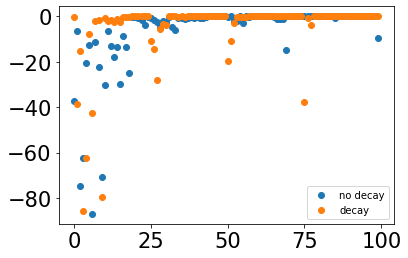

In [46]:
plt.figure()
plt.scatter(np.arange(100), results_no_decay.objective, label="no decay")
plt.scatter(np.arange(100), results_decay.objective, label="decay")
plt.legend()
plt.show()

In [7]:
41728/(128*4)

81.5

In [6]:
import numpy as np
import scipy.stats

In [7]:
np.mean(scipy.stats.truncexpon.rvs(b=3.891, size=10))

1.4427109524018777